# Data Collection

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/food-image-classification-dataset")

print("Path to dataset files:", path)

!ls {path}

Path to dataset files: /kaggle/input/food-image-classification-dataset
'Food Classification dataset'


In [ ]:
!ls "{path}/Food Classification dataset"

 apple_pie	 chicken_curry	   Fries	  kulfi         pizza
'Baked Potato'	 chole_bhature	  'Hot Dog'	  masala_dosa   samosa
 burger		'Crispy Chicken'   ice_cream	  momos         Sandwich
 butter_naan	 dal_makhani	   idli		  omelette      sushi
 chai		 dhokla		   jalebi	  paani_puri    Taco
 chapati	 Donut		   kaathi_rolls   pakode        Taquito
 cheesecake	 fried_rice	   kadai_paneer   pav_bhaji


In [ ]:
from pathlib import Path

base_dir_path = f"{path}/Food Classification dataset"
base_dir = Path(base_dir_path)

for item in base_dir.iterdir():
    print(len(list(item.iterdir())), "files in", item)

323 files in /kaggle/input/food-image-classification-dataset/Food Classification dataset/momos
245 files in /kaggle/input/food-image-classification-dataset/Food Classification dataset/dhokla
279 files in /kaggle/input/food-image-classification-dataset/Food Classification dataset/kaathi_rolls
376 files in /kaggle/input/food-image-classification-dataset/Food Classification dataset/chole_bhature
273 files in /kaggle/input/food-image-classification-dataset/Food Classification dataset/masala_dosa
1500 files in /kaggle/input/food-image-classification-dataset/Food Classification dataset/Donut
1500 files in /kaggle/input/food-image-classification-dataset/Food Classification dataset/Sandwich
1548 files in /kaggle/input/food-image-classification-dataset/Food Classification dataset/Hot Dog
295 files in /kaggle/input/food-image-classification-dataset/Food Classification dataset/dal_makhani
331 files in /kaggle/input/food-image-classification-dataset/Food Classification dataset/burger
1000 files in

In [ ]:
import polars as pl
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
image_shape = (64, 64)
image_flow_batch_size = 32

generator = ImageDataGenerator()

image_flow = generator.flow_from_directory(
    base_dir,
    target_size=image_shape,
    batch_size=image_flow_batch_size,
)

Found 23873 images belonging to 34 classes.


In [ ]:
image_flow.class_indices

{'Baked Potato': 0,
 'Crispy Chicken': 1,
 'Donut': 2,
 'Fries': 3,
 'Hot Dog': 4,
 'Sandwich': 5,
 'Taco': 6,
 'Taquito': 7,
 'apple_pie': 8,
 'burger': 9,
 'butter_naan': 10,
 'chai': 11,
 'chapati': 12,
 'cheesecake': 13,
 'chicken_curry': 14,
 'chole_bhature': 15,
 'dal_makhani': 16,
 'dhokla': 17,
 'fried_rice': 18,
 'ice_cream': 19,
 'idli': 20,
 'jalebi': 21,
 'kaathi_rolls': 22,
 'kadai_paneer': 23,
 'kulfi': 24,
 'masala_dosa': 25,
 'momos': 26,
 'omelette': 27,
 'paani_puri': 28,
 'pakode': 29,
 'pav_bhaji': 30,
 'pizza': 31,
 'samosa': 32,
 'sushi': 33}

In [ ]:
df = pl.DataFrame({
    "filepath": image_flow.filepaths,
    "label": image_flow.classes
})

print("Dataset size:", len(df))
df.head()

Dataset size: 23873


filepath,label
str,i32
"""/kaggle/input/food-image-class…",0
"""/kaggle/input/food-image-class…",0
"""/kaggle/input/food-image-class…",0
"""/kaggle/input/food-image-class…",0
"""/kaggle/input/food-image-class…",0


# Data Preprocessing & Representation

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
def get_array_img_from_filepath(filepath):
    img = load_img(filepath, target_size=image_shape)
    arr = img_to_array(img) / 255
    return arr

In [ ]:
X = []

counter = 0
limit = 10
for filepath in df["filepath"]:
    counter += 1
    arr = get_array_img_from_filepath(filepath)
    X.append(arr)
X = np.array(X)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
y = to_categorical(df["label"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Modelization

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
num_classes = len(image_flow.class_indices)

model = Sequential([
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
X_train.shape, y_train.shape

((19098, 64, 64, 3), (19098, 34))

In [ ]:
X_train.dtype, y_train.dtype

(dtype('float32'), dtype('float64'))

In [ ]:
fitting_batch_size = 32
num_epochs = 10

callbacks = [
    EarlyStopping(
        patience=2
    )
]

history = model.fit(X_train, y_train, batch_size=fitting_batch_size, epochs=num_epochs, callbacks=callbacks, validation_split=0.1)

Epoch 1/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 111s 202ms/step - accuracy: 0.0916 - loss: 3.2318 - val_accuracy: 0.1707 - val_loss: 2.8851
Epoch 2/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 141s 201ms/step - accuracy: 0.1943 - loss: 2.7634 - val_accuracy: 0.1948 - val_loss: 2.7704
Epoch 3/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 141s 198ms/step - accuracy: 0.2511 - loss: 2.5919 - val_accuracy: 0.2518 - val_loss: 2.6065
Epoch 4/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 111s 207ms/step - accuracy: 0.2968 - loss: 2.4439 - val_accuracy: 0.2801 - val_loss: 2.5174
Epoch 5/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 138s 200ms/step - accuracy: 0.3373 - loss: 2.2700 - val_accuracy: 0.3340 - val_loss: 2.3763
Epoch 6/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 144s 204ms/step - accuracy: 0.3945 - loss: 2.0772 - val_accuracy: 0.3487 - val_loss: 2.2351
Epoch 7/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 141s 202ms/step - accuracy: 0.4209 - loss: 1.9492 - val_accuracy: 0.3524 - val_loss: 2.2644
Epoch 8/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 109s 203ms/step - accuracy: 0.4666 -

In [ ]:
import matplotlib.pyplot as plt

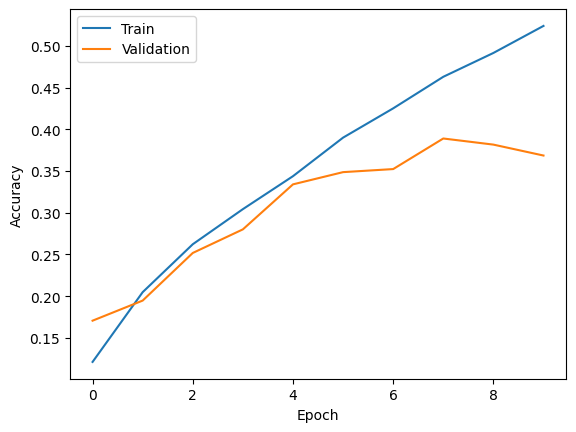

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

# Evaluation & Test

In [ ]:
labels = list(image_flow.class_indices.keys())

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.3858 - loss: 2.1926
Test Loss: 2.2183494567871094
Test Accuracy: 0.38178011775016785


In [ ]:
sample_selector = lambda li: li[:10]

samples = sample_selector(X_test)
samples_labels = sample_selector(y_test)

In [ ]:
y_pred_logits = model.predict(samples)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
y_pred = np.argmax(y_pred_logits, axis=1)
y_true = np.argmax(samples_labels, axis=1)

print("Classification Report")
print(classification_report(y_true, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           2       0.25      1.00      0.40         1
           3       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          25       1.00      1.00      1.00         1

    accuracy                           0.50        10
   macro avg       0.38      0.45      0.39        10
weighted avg       0.42      0.50      0.44        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

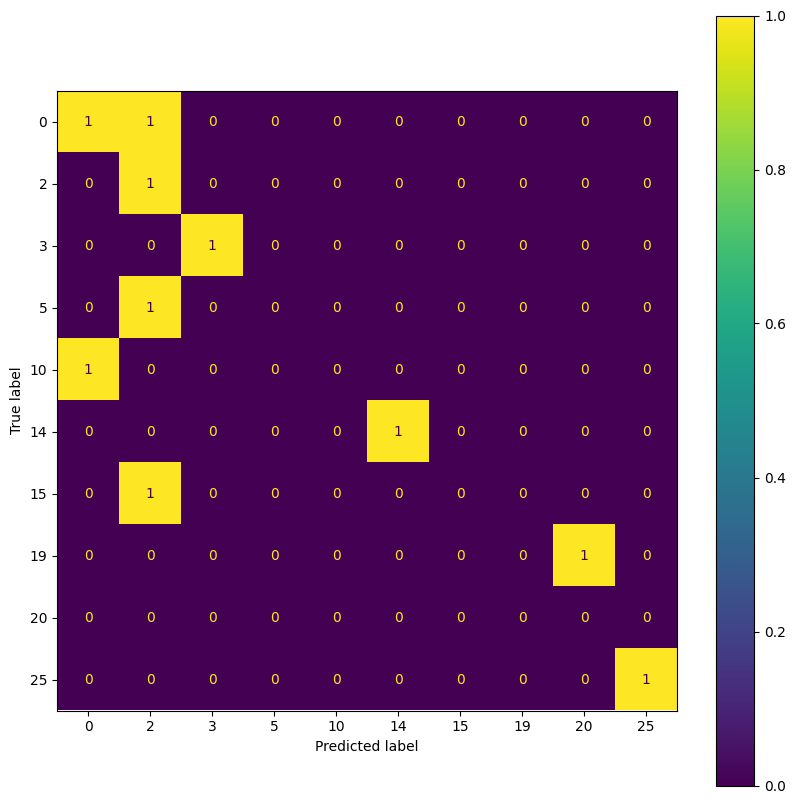

In [ ]:
_, axes = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=axes)

In [ ]:
sample_img_paths = [
    "images/sushi-image.jpg",
]

samples = np.array([
    get_array_img_from_filepath(filepath)
    for filepath in sample_img_paths
])

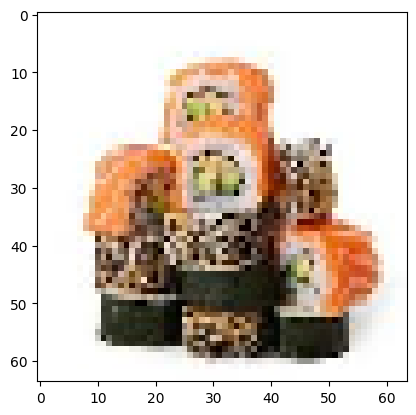

In [ ]:
img_to_display_index = 0

plt.imshow(samples[img_to_display_index])

In [ ]:
pred_logits = model.predict(samples)
preds = np.argmax(pred_logits, axis=1)

for index, img_path in enumerate(sample_img_paths):
    print("Image:", index)
    print("Filepath:", img_path)
    prediction = preds[index]
    print("Predicted as:", prediction, labels[prediction])
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image: 0
Filepath: images/sushi-image.jpg
Predicted as: 6 Taco

